# Plot heat stress indices during heatwave periods
- This script is used to plot heat stress indices from simulations;
- Simulations: CNTL, TRAF at UK-Manchester. 

In [1]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cftime
import string
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
from pandas import Timedelta
home_path = '/gws/nopw/j04/duicv/yuansun/'

In [2]:
df = pd.read_csv(f'data_for_figure/heat_stress.csv')
df['time'] = pd.to_datetime(df['time'])
df.head()

,time,HIA_U_cntl,SWBGT_U_cntl,DISCOIS_U_cntl,TSA_U_cntl,RH2M_cntl,TG_U_cntl,HIA_U_traffic,SWBGT_U_traffic,DISCOIS_U_traffic,TSA_U_traffic,RH2M_traffic,TG_U_traffic
0,2022-01-01 00:00:00,13.521703,16.908200,12.794920,286.67170,87.045790,285.81744,13.521703,16.908200,12.794920,286.67170,87.045790,285.87110
1,2022-01-01 01:00:00,13.719227,17.066988,12.971046,286.86923,86.692060,285.81100,13.762678,17.100878,13.008828,286.91270,86.596940,285.88840
2,2022-01-01 02:00:00,13.786898,17.089806,13.003592,286.93690,86.060380,285.51996,13.833845,17.125364,13.043524,286.98386,85.941956,285.58487
3,2022-01-01 03:00:00,13.437405,16.687878,12.583859,286.58740,84.677000,285.15082,13.467084,16.709967,12.608978,286.61710,84.600000,285.21088
4,2022-01-01 04:00:00,13.146071,16.361630,12.238682,286.29608,83.592514,284.87840,13.173216,16.381832,12.261818,286.32320,83.525180,284.93580


In [21]:
col = 2
row = 3
var_list = ['HIA_U', 'SWBGT_U', 'DISCOIS_U'] #'APPAR_TEMP_U'
case_list = ['cntl', 'traffic']
label_list = ['CNTL', 'TRAF']
lc1 = '#d95f02'
lc2 = '#7570b3'
lc = [lc1, lc2]
linewidth = 0.5
labelcolor = '#6b6b6b'
hw1_start_date = pd.to_datetime('2022-07-17 00:00:00') # 3 days
hw1_end_date = pd.to_datetime('2022-07-20 00:00:00')
hw2_start_date = pd.to_datetime('2022-08-09 00:00:00') # 6 days
hw2_end_date = pd.to_datetime('2022-08-15 00:00:00')
hw_start_list = [hw1_start_date, hw2_start_date]
hw_end_list = [hw1_end_date, hw2_end_date]
ax_ymin_list=[10, 16, 12]
ax_ymax_list=[54, 40, 36]
ax2_ymin_list=[-2, -1, -1]
ax2_ymax_list=[6, 1, 1]
labelfont=6
pad = 1
xwidth=0.5
length=2
handletextpad=0.5
title_list = ['NWS_HI', 'sWBGT', 'DI']
padding = 4
alpha=0.25
threshold_list = [[27, 33, 40],
                  [29.4, 31.1, 32.2],
                  [27, 29, 32]]
#red_list = ['#ff9696', '#ff3232', '#ff0000'] #'#ff6464', '#ffbbbb',
red_list = ['#fcae91', '#fb6a4a', '#cb181d']
threshold_label_list = [['Caution', 'Extreme caution', 'Danger'],
                        ['Caution', 'Potentially dangerous', 'Dangerous'],
                        ['Most of population in disconfort', 'Sever stress', 'Emergency']]
yaxis_color = red_list[-1]

In [4]:
df_extreme = df[df['HIA_U_traffic']>=40]
df_extreme_delta = df_extreme['HIA_U_traffic'] - df_extreme['HIA_U_cntl']
df_extreme_delta

4766    0.119785
4767    0.135814
4768    0.154918
4769    0.166435
4785    0.352527
4786    0.191203
4787    0.151656
4788    0.148272
4789    0.141690
4790    0.143404
4791    0.206840
4792    0.109345
dtype: float64

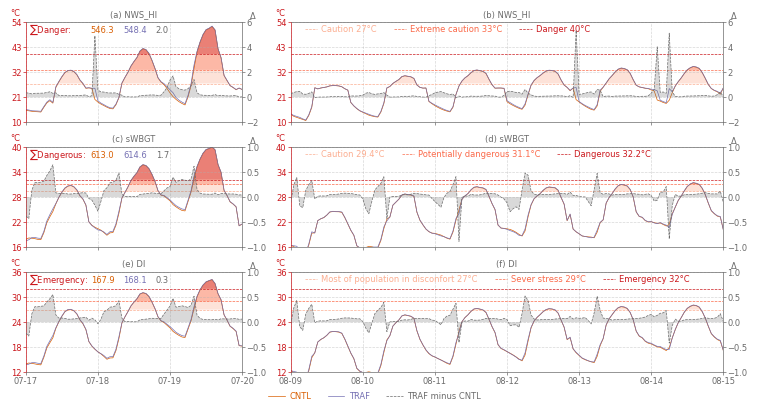

In [23]:
fig = plt.figure(figsize=(7.5, 4))
gs = gridspec.GridSpec(nrows=row, ncols=col, width_ratios=[1, 2])
ax = []
for r in range(row):
    for c in range(col):
        ax.append(fig.add_subplot(gs[r, c]))
for i in range(row*col):
    var_index = i // col
    var = var_list[var_index]
    hw_index =  i % col
    hw_start_date = hw_start_list[hw_index]
    hw_end_date = hw_end_list[hw_index]
    df_hw = df[(df['time'] >= hw_start_date) & (df['time'] <= hw_end_date)]
    ax2 = ax[i].twinx()
    ax_ymax = ax_ymax_list[var_index]
    ax_ymin = ax_ymin_list[var_index]
    ax2_ymax = ax2_ymax_list[var_index]
    ax2_ymin = ax2_ymin_list[var_index]
    delta = df_hw [f'{var}_traffic'] - df_hw [f'{var}_cntl']
    threshold= threshold_list[var_index]
    threshold_label=threshold_label_list[var_index]
    for t in threshold:
        ax[i].axhline(y=t, linestyle='--', linewidth=linewidth, color=red_list[threshold.index(t)], label = threshold_label[threshold.index(t)] + ' ' + str(t) + '°C')
        ax[i].fill_between(df_hw['time'], df_hw[f'{var}_traffic'], t, where=(df_hw[f'{var}_traffic'] > t), interpolate=True, color=red_list[threshold.index(t)], edgecolor='none', alpha=0.35)
        #ax[i].text(df_hw['time'].iloc[0]-Timedelta(hours=5), t, f'{t}', color=red_list[threshold.index(t)], fontsize=labelfont, ha='left', va='center')
    for c, case in enumerate(case_list):
        ax[i].plot(df_hw['time'], df_hw[f'{var}_{case}'], label=label_list[c], color = lc[c], linewidth=linewidth)
    ax2.plot(df_hw['time'], delta, label='TRAF minus CNTL', color=labelcolor, linewidth=linewidth, linestyle='--')   
    ax2.fill_between(df_hw['time'], delta, 0, color=labelcolor, alpha=alpha, edgecolor='none')
    ax[i].set_ylim(ax_ymin, ax_ymax)
    ax2.set_ylim(ax2_ymin, ax2_ymax)
    ax[i].set_yticks([ax_ymin, ax_ymin + (ax_ymax - ax_ymin)/4, (ax_ymin + ax_ymax)/2, ax_ymax - (ax_ymax - ax_ymin)/4, ax_ymax])
    ax2.set_yticks([ax2_ymin, ax2_ymin + (ax2_ymax - ax2_ymin)/4, (ax2_ymin + ax2_ymax)/2, ax2_ymax - (ax2_ymax - ax2_ymin)/4, ax2_ymax])
    ax[i].tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelcolor=yaxis_color, color=yaxis_color,labelsize=labelfont,pad=pad, width = xwidth, length = length)
    if i // col == 2:
         ax[i].tick_params(axis='x', which='both', top=False, bottom=True, labelbottom=True, labelcolor=labelcolor,color=labelcolor,labelsize=labelfont,pad=pad, width = xwidth, length = length)
    else:
         ax[i].tick_params(axis='x', which='both', top=False, bottom=True, labelbottom=False, labelcolor=labelcolor,color=labelcolor,labelsize=labelfont,pad=pad, width = xwidth, length = length)   
    for spine in ax[i].spines.values():
        spine.set_linewidth(xwidth)
        spine.set_edgecolor(labelcolor) 
    ax[i].spines['left'].set_color(yaxis_color)    
    ax2.tick_params(axis='y', which='both', left=False, right=True, labelleft=False, labelcolor=labelcolor, color=labelcolor,labelsize=labelfont,pad=pad, width = xwidth, length = length)
    ax2.tick_params(axis='x', which='both', top=False, bottom=False, labelbottom=False)    
    for spin in ax2.spines.values():
        spin.set_visible(False)      
    ax[i].set_xlim(df_hw['time'].min(), df_hw['time'].max()) 
    xticks = df_hw['time'].iloc[0::24] 
    ax[i].set_xticks(xticks)   
    xticks_label = [d.strftime('%m-%d') for d in xticks]
    ax[i].set_xticklabels(xticks_label, fontsize=labelfont, color=labelcolor)
    ax[i].grid(True,linestyle='--',linewidth=0.5, alpha=0.5)
    ax[i].set_title(f'({string.ascii_lowercase[i]}) {title_list[i// col]}',fontsize=labelfont,color=labelcolor, pad = padding)  
    if i%col==0:
        axloc = -0.05
        ax2loc = 1.05
    else:
        axloc = -0.025 
        ax2loc = 1.025    
    ax[i].set_ylabel('°C' ,labelpad=5, rotation=0, ha='center', fontsize=labelfont,color=yaxis_color)   
    ax[i].yaxis.set_label_coords(axloc, 1.05)
    ax2.set_ylabel(r'$\Delta$' ,labelpad=5, rotation=0, ha='center', fontsize=labelfont,color=labelcolor)
    ax2.yaxis.set_label_coords(ax2loc, 1.125)
    line, label = ax[i].get_legend_handles_labels()
    if i%col==1:
       threshold_legend = ax[i].legend(line[0:3], label[0:3], loc='upper left', fontsize=labelfont, frameon=False, handletextpad=handletextpad, bbox_to_anchor=(0.015, 1.05), handlelength=1.5, ncol=3)
       for t, text in enumerate(threshold_legend.get_texts()):
           text.set_color(red_list[t]) 
    # accumulated heat stress
    else:
        last_threshold = threshold[-1]
        df_extreme = df_hw[df_hw[f'{var}_cntl']>=last_threshold]
        cntl_sum = np.round(df_extreme[f'{var}_cntl'].sum(),1)
        traffic_sum = np.round(df_extreme[f'{var}_traffic'].sum(),1)
        delta = df_extreme[f'{var}_traffic'] - df_extreme[f'{var}_cntl']
        delta_sum = np.round(delta.sum(),1)
        #print(delta_sum)
        ax[i].text(0.015, 0.925, r'$\sum$'+ f'{threshold_label[-1]}: ', transform=ax[i].transAxes, fontsize=labelfont, color=yaxis_color, ha='left', va='center')
        ax[i].text(0.3, 0.925, str(cntl_sum), transform=ax[i].transAxes, fontsize=labelfont, color=lc[0], ha='left', va='center')
        ax[i].text(0.45, 0.925, str(traffic_sum), transform=ax[i].transAxes, fontsize=labelfont, color=lc[1], ha='left', va='center')
        ax[i].text(0.6, 0.925, str(delta_sum), transform=ax[i].transAxes, fontsize=labelfont, color=labelcolor, ha='left', va='center')
plt.subplots_adjust(left=0.035, right=0.965, bottom=0.075, top=0.95, wspace=0.15, hspace= 0.25)
lines1, labels1 = ax[0].get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1[-2:] + lines2
labels = labels1[-2:] + labels2
legend = fig.legend(lines, labels, bbox_to_anchor=(0.5, -0.015), loc='lower center', frameon=False, 
                        handletextpad=handletextpad, fontsize=labelfont, ncol=8)
for i, text in enumerate(legend.get_texts()):
    text.set_color((lc + [labelcolor]*2)[i])    
fig.savefig('heatwave.png', dpi=300)   
fig.savefig('heatwave.pdf', dpi=600)

# Description

In [116]:
df_hw1 = df[(df['time'] >= hw1_start_date) & (df['time'] <= hw1_end_date)]
df_hw2 = df[(df['time'] >= hw2_start_date) & (df['time'] <= hw2_end_date)]
df_hw1.set_index('time', inplace=True)
df_hw2.set_index('time', inplace=True)
df_hw1

,HIA_U_cntl,SWBGT_U_cntl,DISCOIS_U_cntl,HIA_U_traffic,SWBGT_U_traffic,DISCOIS_U_traffic
time,,,,,,
2022-07-17 00:00:00,15.232921,17.869713,13.969593,15.581079,17.491894,13.749099
2022-07-17 01:00:00,15.003815,18.211575,14.201366,15.330586,17.784555,13.923243
2022-07-17 02:00:00,14.780035,18.154907,14.108988,15.042110,18.292065,14.276248
2022-07-17 03:00:00,14.645976,18.040150,13.985980,14.957151,18.335384,14.295340
2022-07-17 04:00:00,14.583153,17.872175,13.831219,14.896192,18.161797,14.137827
...,...,...,...,...,...,...
2022-07-19 20:00:00,26.042950,26.871616,23.007860,26.139933,26.935627,23.072311
2022-07-19 21:00:00,25.220531,26.334800,22.460867,25.337694,26.398672,22.531116
2022-07-19 22:00:00,24.251219,25.658539,21.778370,24.388018,25.717718,21.849428


In [114]:
df_hw1['HIA_U_delta'] = (df_hw1['HIA_U_traffic'] - df_hw1['HIA_U_cntl'])
max_delta_index = df_hw1['HIA_U_delta'].idxmax()
print(max_delta_index, df_hw1['HIA_U_delta'].max()) 

2022-07-17 23:00:00 4.918285000000001


/tmp/ipykernel_1863755/1027238336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hw1['HIA_U_delta'] = (df_hw1['HIA_U_traffic'] - df_hw1['HIA_U_cntl'])


In [117]:
df_hw2['HIA_U_delta'] = (df_hw2['HIA_U_traffic'] - df_hw2['HIA_U_cntl'])
max_delta_index = df_hw2['HIA_U_delta'].idxmax()
print(max_delta_index, df_hw2['HIA_U_delta'].max()) 

2022-08-12 23:00:00 5.334766999999999


/tmp/ipykernel_1863755/912827692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hw2['HIA_U_delta'] = (df_hw2['HIA_U_traffic'] - df_hw2['HIA_U_cntl'])
